In [12]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
# get panel_len
with open('data_small.csv', 'r') as f:
    reader = csv.DictReader(f)
    panel_len = 0
    for row in reader:
        panel_len += 1
print(panel_len)

2499


In [22]:
fid_dict = dict()
NULL_VALUE = -1
with open('data_small.csv', 'r') as f:
    reader = csv.DictReader(f)
    fieldnames = reader.fieldnames
    fid_index = fieldnames[0]
    date_index = fieldnames[1]
    question_codes = fieldnames[2:]
    question_len = len(question_codes)
    data = np.zeros((panel_len, question_len))
    
    for panel_id, row in enumerate(reader):
        fid = row[fid_index]
        date = row[date_index]
        fid_dict[fid] = panel_id
        for question_id, question_code in enumerate(question_codes):
            answer = row[question_code]
            try:
                data[panel_id, question_id] = float(row[question_code])
            except ValueError as e:
                if answer == 'NULL' or answer == ' ':
                    data[panel_id, question_id] = NULL_VALUE
                else:
                    print(e)
                    print('question_code : %s, answer : %s'%(question_code, answer))

In [24]:
data.shape

(2499, 699)

In [31]:
# data exploration

In [44]:
def get_answer(fid, question_code):
    return data[fid_dict[fid], question_codes.index(question_code)]
    

def plot_histogram(question_code):
    tmp_data = np.reshape(data[:, question_codes.index(question_code)], -1)
    plt.hist(tmp_data)

In [45]:
get_answer('A0000056', 'X0002')

4.0

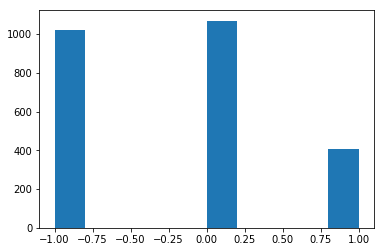

In [72]:
plot_histogram(question_codes[26])

In [27]:
# abnormality

In [37]:
tmp = np.reshape(data[:, 1:2], -1)

(array([  42.,    0.,  886.,    0.,  825.,    0.,  514.,    0.,  186.,   46.]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ]),
 <a list of 10 Patch objects>)

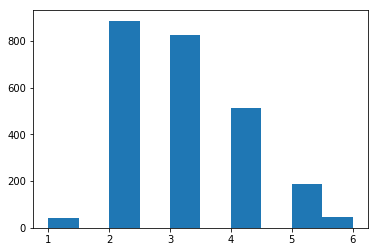

In [38]:
plt.hist(tmp)